**LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERN"**

**LGMVIP March-22**

**AUTHOR - NIKHIL ESHWAR**

Advanced Level Task

TASK-8- Next Word Prediction :

Using Tensorflow and Keras library train a RNN, to predict the next word.


Dataset link : https://drive.google.com/file/d/1GeUzNVqiixXHnTl8oNiQ2W3CynX_lsu2/view

**Importing Necessary Libraries**

In [4]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense, Activation, Dropout, RepeatVector
from tensorflow.keras.optimizers import  RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

**Loading the dataset**

In [5]:
path = '1661-0.txt'
text = open(path,encoding = "utf8").read().lower()
print('corpus length:', len(text))

corpus length: 581888


**Pre Processing of Data**

In [6]:
character = sorted(set(text))
char_indices = {char: index for index, char in enumerate(character)}
indices_char = {index: char for index, char in enumerate(character)}
print(f'Number of unique characters: {len(character)}')

Number of unique characters: 73


In [7]:
seq_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_len, step):
    sentences.append(text[i: i + seq_len ])
    next_chars.append(text[i + seq_len])
print(f'Number Of training examples: {len(sentences)}')

Number Of training examples: 193950


In [8]:
X = np.zeros((len(sentences), seq_len, len(character)), dtype=np.bool)
y = np.zeros((len(sentences), len(character)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

sentences[124]
next_chars[100]

<ipython-input-8-b837ced14d63>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.zeros((len(sentences), seq_len, len(character)), dtype=np.bool)
<ipython-input-8-b837ced14d63>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(sentences), len(character)), dtype=np.bool)


'e'

In [9]:
X.shape

(193950, 40, 73)

In [10]:
y.shape

(193950, 73)

**Model Creation**

In [11]:
model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, len(character))))
model.add(Dense(len(character)))
model.add(Activation('softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               103424    
                                                                 
 dense (Dense)               (None, 73)                9417      
                                                                 
 activation (Activation)     (None, 73)                0         
                                                                 
Total params: 112,841
Trainable params: 112,841
Non-trainable params: 0
_________________________________________________________________


**Model Training**

In [13]:
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y,validation_split=0.01, batch_size=128,epochs=7,shuffle=True).history

Epoch 1/7
1501/1501 [==============================] - 16s 5ms/step - loss: 2.0852 - accuracy: 0.3908 - val_loss: 2.3476 - val_accuracy: 0.3696
Epoch 2/7
1501/1501 [==============================] - 8s 5ms/step - loss: 1.7065 - accuracy: 0.4886 - val_loss: 2.1463 - val_accuracy: 0.4052
Epoch 3/7
1501/1501 [==============================] - 8s 6ms/step - loss: 1.5805 - accuracy: 0.5237 - val_loss: 2.0164 - val_accuracy: 0.4309
Epoch 4/7
1501/1501 [==============================] - 8s 5ms/step - loss: 1.5117 - accuracy: 0.5427 - val_loss: 1.9625 - val_accuracy: 0.4701
Epoch 5/7
1501/1501 [==============================] - 8s 6ms/step - loss: 1.4645 - accuracy: 0.5551 - val_loss: 1.9448 - val_accuracy: 0.4588
Epoch 6/7
1501/1501 [==============================] - 8s 5ms/step - loss: 1.4308 - accuracy: 0.5657 - val_loss: 1.9789 - val_accuracy: 0.4701
Epoch 7/7
1501/1501 [==============================] - 8s 5ms/step - loss: 1.4054 - accuracy: 0.5724 - val_loss: 1.9119 - val_accuracy: 0.477

**Model Evaluation**

In [14]:
loss_and_acc=model.evaluate(X,y)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

6061/6061 [==============================] - 24s 4ms/step - loss: 1.3610 - accuracy: 0.5837
Test Loss 1.3609675168991089
Test Accuracy 0.5836865305900574


**Training & Validation Graphs**

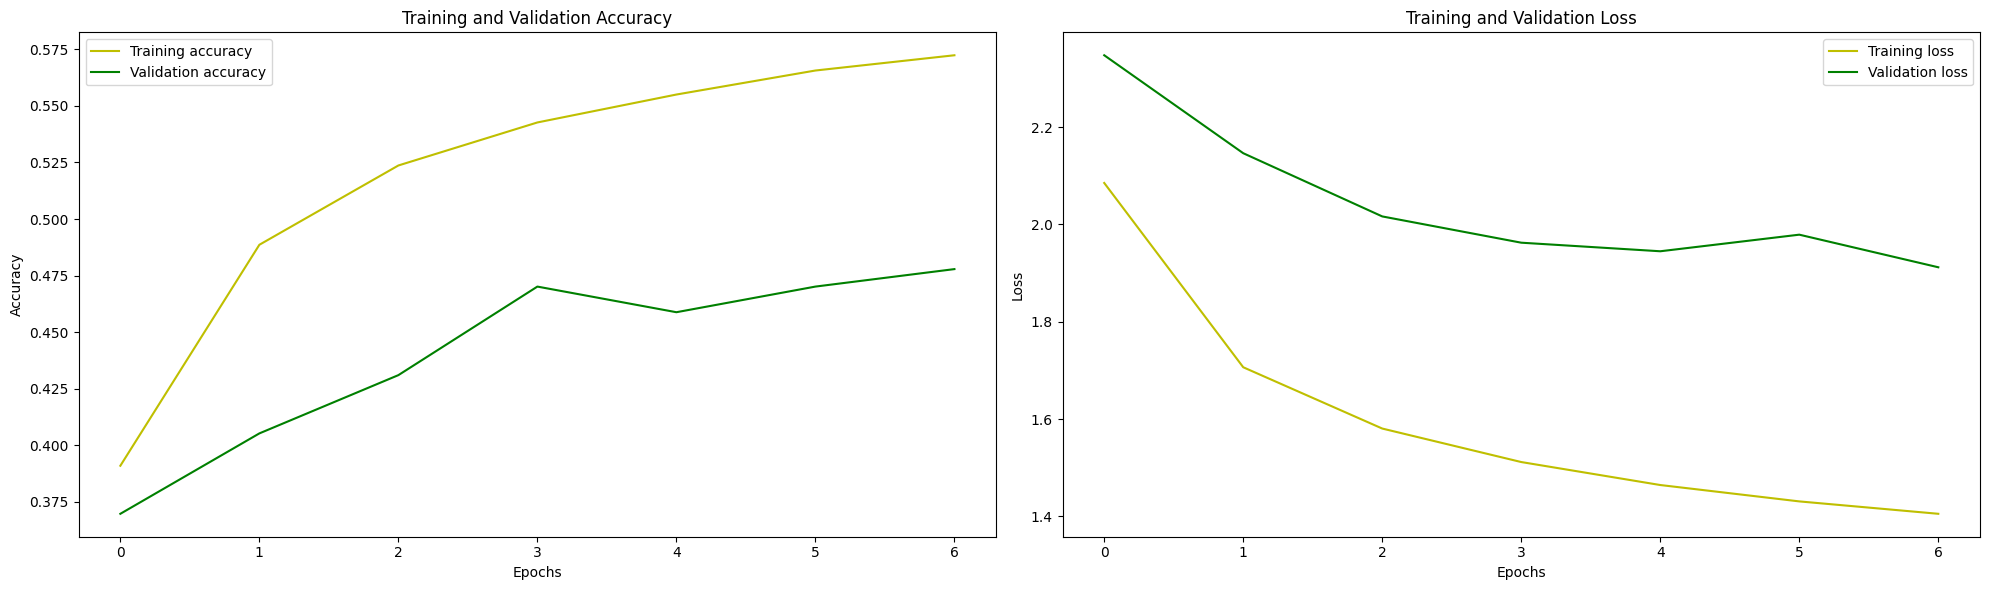

In [16]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss =history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].set_title('Training and Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.tight_layout()

Function for automating the prediction of next possible characters

In [24]:
def prepare_input(text):
    x = np.zeros((1, seq_len, len(character)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.

    return x

In [18]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [19]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char

        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [20]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

**Model Prediction**

In [31]:
quotes = [
    "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
    "Recurrent neural network (RNN) is a type of artificial neural network which uses sequential data or time series data.",
    "Thanks for spending your precious time to view my work."
]

In [32]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

it is not a lack of love, but a lack of 
['the ', 'a ', 'me ', 'her ', 'street ']

recurrent neural network (rnn) is a type
['wreather ', 'ression ', 'lied ', 'tion ', 'come ']

thanks for spending your precious time t
['o ', 'hat ', 'able ', 'race ', 'erest ']

